In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
from scipy import stats
np.random.seed(seed=42)
from collections import Counter
import os

In [3]:
# creating dataframes 
area_train = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/coupon_area_train.csv")
detail_train = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/coupon_detail_train.csv")
list_train = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/coupon_list_train.csv")
visit_train = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/coupon_visit_train.csv")
locations = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/prefecture_locations.csv")
users = pd.read_csv("/Users/TheUnit/Desktop/Marilyn-Capstone3/user_list.csv")

In [6]:
# area train df
area_train 

,SMALL_AREA_NAME,PREF_NAME,COUPON_ID_hash
0,埼玉,埼玉県,6b263844241eea98c5a97f1335ea82af
1,千葉,千葉県,cc031f250e8bad1e24060263b9fc0ddd
2,千葉,千葉県,ba5e9b7453ca52ff711635a5d2e8102d
3,千葉,千葉県,3e1ffbedca3569f9e8032d401e8cb4e6
4,千葉,千葉県,782934b6c815b4030ea204eef7d4a734
...,...,...,...
138180,新潟,新潟県,fe334f1a5e0dc54eca76b9dd9559661b
138181,新宿・高田馬場・中野・吉祥寺,東京都,8dc11b257cb1c5b98e7b7c66d9b2b779
138182,渋谷・青山・自由が丘,東京都,b15e2d7619c3fd9c6be567c971bdf4f4
138183,銀座・新橋・東京・上野,東京都,e1141a4b2798450f36e40090659c0b07


In [13]:
area_train.columns

Index(['SMALL_AREA_NAME', 'PREF_NAME', 'COUPON_ID_hash'], dtype='object')

In [15]:
area_train.describe()

,SMALL_AREA_NAME,PREF_NAME,COUPON_ID_hash
count,138185,138185,138185
unique,55,47,19368
top,キタ,東京都,75dda185c9a2d6006ebb892a05477c09
freq,3596,19720,55


In [14]:
area_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138185 entries, 0 to 138184
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SMALL_AREA_NAME  138185 non-null  object
 1   PREF_NAME        138185 non-null  object
 2   COUPON_ID_hash   138185 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [7]:
# detail train df 
detail_train

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
0,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a
1,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7
2,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
3,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
4,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
...,...,...,...,...,...,...
168991,1,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,280f0cedda5c4b171ee6245889659571,6eac7a7e347c563e5e00086f5eb47903
168992,1,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,280f0cedda5c4b171ee6245889659571,a406e389e35e1140e4bc9b472d8258df
168993,1,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,280f0cedda5c4b171ee6245889659571,36addcc4b958135895c859d8783e3cd2
168994,2,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,280f0cedda5c4b171ee6245889659571,cb0244705306aafccc47bfe62ece39d3


In [16]:
detail_train.columns

Index(['ITEM_COUNT', 'I_DATE', 'SMALL_AREA_NAME', 'PURCHASEID_hash',
       'USER_ID_hash', 'COUPON_ID_hash'],
      dtype='object')

In [18]:
detail_train.describe()

,ITEM_COUNT
count,168996.000000
mean,1.430939
std,0.982732
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,55.000000


In [17]:
detail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [8]:
# list train df 
list_train

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d
3,グルメ,グルメ,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1.0,0.0,0.0,1.0,1.0,1.0,関東,千葉県,千葉,3e1ffbedca3569f9e8032d401e8cb4e6
4,グルメ,グルメ,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,1.0,0.0,0.0,1.0,1.0,0.0,関東,千葉県,千葉,782934b6c815b4030ea204eef7d4a734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19408,ネイル・アイ,ネイル・アイ,65,10000,3500,2011-07-14 12:00:00,2011-07-17 12:00:00,3,2011-07-18,2011-12-30,...,1.0,1.0,1.0,1.0,1.0,1.0,北信越,新潟県,新潟,fe334f1a5e0dc54eca76b9dd9559661b
19409,グルメ,グルメ,50,5980,2990,2011-09-30 12:00:00,2011-10-03 12:00:00,3,2011-10-04,2012-02-29,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,8dc11b257cb1c5b98e7b7c66d9b2b779
19410,グルメ,グルメ,50,6300,3150,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-06,2011-11-30,...,1.0,2.0,2.0,1.0,1.0,2.0,関東,東京都,渋谷・青山・自由が丘,b15e2d7619c3fd9c6be567c971bdf4f4
19411,グルメ,グルメ,50,2400,1200,2011-07-15 12:00:00,2011-07-17 12:00:00,2,2011-07-18,2011-10-31,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,銀座・新橋・東京・上野,e1141a4b2798450f36e40090659c0b07


In [19]:
list_train.columns

Index(['CAPSULE_TEXT', 'GENRE_NAME', 'PRICE_RATE', 'CATALOG_PRICE',
       'DISCOUNT_PRICE', 'DISPFROM', 'DISPEND', 'DISPPERIOD', 'VALIDFROM',
       'VALIDEND', 'VALIDPERIOD', 'USABLE_DATE_MON', 'USABLE_DATE_TUE',
       'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI',
       'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY',
       'USABLE_DATE_BEFORE_HOLIDAY', 'large_area_name', 'ken_name',
       'small_area_name', 'COUPON_ID_hash'],
      dtype='object')

In [21]:
list_train.describe()

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY
count,19413.000000,19413.000000,19413.000000,19413.000000,13266.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000
mean,58.478391,11818.368258,4332.877659,3.166950,125.955902,0.936009,0.953901,0.982189,0.981867,1.000242,1.067618,0.921422,0.938024,1.044246
std,11.266571,16881.898880,5459.667448,1.346859,46.599249,0.309854,0.314045,0.217525,0.198105,0.319562,0.563260,0.424181,0.399619,0.534511
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,3675.000000,1550.000000,2.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,53.000000,6500.000000,2750.000000,3.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,13650.000000,4800.000000,4.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,680000.000000,100000.000000,36.000000,179.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [22]:
list_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64
 13  USABLE_DATE_WED             124

In [9]:
# visit train 
visit_train

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
...,...,...,...,...,...,...,...,...
2833175,0,2011-08-20 12:13:21,4,ae75a8764951d2454273df8348dac8f3,8d91be4a8b5b02cf7117cb2b8e2d5a16,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN
2833176,0,2011-08-20 12:19:05,7,48243ea50a35bb107fafd46a461b0b28,0fc7873f2a0bd451b97e97bd6b792ba9,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN
2833177,0,2011-07-12 08:48:09,5,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN
2833178,0,2011-07-12 08:50:03,8,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN


In [23]:
visit_train.columns

Index(['PURCHASE_FLG', 'I_DATE', 'PAGE_SERIAL', 'REFERRER_hash',
       'VIEW_COUPON_ID_hash', 'USER_ID_hash', 'SESSION_ID_hash',
       'PURCHASEID_hash'],
      dtype='object')

In [24]:
visit_train.describe()

,PURCHASE_FLG,PAGE_SERIAL
count,2.833180e+06,2.833180e+06
mean,4.319846e-02,7.654980e+00
std,2.033036e-01,1.215241e+01
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.000000e+00
50%,0.000000e+00,4.000000e+00
75%,0.000000e+00,9.000000e+00
max,1.000000e+00,1.368000e+03


In [25]:
visit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [10]:
# users df
users

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb
1,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed
2,2011-06-13 16:36:58,m,41,NaN,愛知県,e66ae91b978b3229f8fd858c80615b73
3,2012-02-08 12:56:15,m,25,NaN,NaN,43fc18f32eafb05713ec02935e2c2825
4,2011-05-22 23:43:56,m,62,NaN,神奈川県,dc6df8aa860f8db0d710ce9d4839840f
...,...,...,...,...,...,...
22868,2011-12-12 15:42:56,f,24,NaN,NaN,2f0a2f36a9f63b6ba2fa3a7e53bef906
22869,2011-08-10 00:49:55,m,41,NaN,京都府,6ae7811a9c7c58546d6a1567ab098c21
22870,2012-04-05 12:24:23,f,35,NaN,NaN,a417308c6a79ae0d86976401ec2e3b04
22871,2011-02-20 10:34:22,f,59,NaN,NaN,4937ec1c86e71d901c4ccc0357cff0b1


In [26]:
users.columns

Index(['REG_DATE', 'SEX_ID', 'AGE', 'WITHDRAW_DATE', 'PREF_NAME',
       'USER_ID_hash'],
      dtype='object')

In [27]:
users.describe()

,AGE
count,22873.000000
mean,42.497836
std,11.843465
min,15.000000
25%,33.000000
50%,41.000000
75%,51.000000
max,80.000000


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [9]:
users.min()


REG_DATE                     2010-07-21 13:44:02
SEX_ID                                         f
AGE                                           15
USER_ID_hash    0000b53e182165208887ba65c079fc21
dtype: object

In [6]:
users.max()

REG_DATE                     2012-06-30 23:29:01
SEX_ID                                         m
AGE                                           80
USER_ID_hash    ffff56dbf3c782c3532f88c6c79817ba
dtype: object

In [ ]:
# knowing the min and max ages of users - create groups for testing 
# 15-24
# 25-34
# 35-44
# 45-54
# 55 +

In [10]:
# drop a few columns to create new dataframe - users2
users.columns

Index(['REG_DATE', 'SEX_ID', 'AGE', 'WITHDRAW_DATE', 'PREF_NAME',
       'USER_ID_hash'],
      dtype='object')

In [12]:
# creating users2 dataframe 
users2 = users.drop(['REG_DATE', 'WITHDRAW_DATE','PREF_NAME'],axis=1)
users2

,SEX_ID,AGE,USER_ID_hash
0,f,25,d9dca3cb44bab12ba313eaa681f663eb
1,f,34,560574a339f1b25e57b0221e486907ed
2,m,41,e66ae91b978b3229f8fd858c80615b73
3,m,25,43fc18f32eafb05713ec02935e2c2825
4,m,62,dc6df8aa860f8db0d710ce9d4839840f
...,...,...,...
22868,f,24,2f0a2f36a9f63b6ba2fa3a7e53bef906
22869,m,41,6ae7811a9c7c58546d6a1567ab098c21
22870,f,35,a417308c6a79ae0d86976401ec2e3b04
22871,f,59,4937ec1c86e71d901c4ccc0357cff0b1


In [20]:
users2.describe()

,AGE
count,22873.000000
mean,42.497836
std,11.843465
min,15.000000
25%,33.000000
50%,41.000000
75%,51.000000
max,80.000000


In [21]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SEX_ID        22873 non-null  object
 1   AGE           22873 non-null  int64 
 2   USER_ID_hash  22873 non-null  object
dtypes: int64(1), object(2)
memory usage: 536.2+ KB


In [12]:
# location df 
locations

,PREF_NAME,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
0,北海道,札幌市,43.063968,141.347899
1,青森県,青森市,40.824623,140.740593
2,岩手県,盛岡市,39.703531,141.152667
3,宮城県,仙台市,38.268839,140.872103
4,秋田県,秋田市,39.718600,140.102334
5,山形県,山形市,38.240437,140.363634
6,福島県,福島市,37.750299,140.467521
7,茨城県,水戸市,36.341813,140.446793
8,栃木県,宇都宮市,36.565725,139.883565
9,群馬県,前橋市,36.391208,139.060156


In [29]:
locations.columns

Index(['PREF_NAME', 'PREFECTUAL_OFFICE', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [30]:
locations.describe()

,LATITUDE,LONGITUDE
count,47.000000,47.000000
mean,35.382459,136.040062
std,2.618890,3.698895
min,26.212401,127.680932
25%,34.206078,133.290790
50%,35.180188,136.221642
75%,36.478466,139.645723
max,43.063968,141.347899


In [31]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PREF_NAME          47 non-null     object 
 1   PREFECTUAL_OFFICE  47 non-null     object 
 2   LATITUDE           47 non-null     float64
 3   LONGITUDE          47 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [31]:
# joining users2 dataframe + detail_train dataframe -- this concat was not working for me as it was giving me NaNs
user_details = pd.concat([users2, detail_train], join="outer")
user_details

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
0,f,25.0,d9dca3cb44bab12ba313eaa681f663eb,NaN,NaN,NaN,NaN,NaN
1,f,34.0,560574a339f1b25e57b0221e486907ed,NaN,NaN,NaN,NaN,NaN
2,m,41.0,e66ae91b978b3229f8fd858c80615b73,NaN,NaN,NaN,NaN,NaN
3,m,25.0,43fc18f32eafb05713ec02935e2c2825,NaN,NaN,NaN,NaN,NaN
4,m,62.0,dc6df8aa860f8db0d710ce9d4839840f,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
168991,NaN,NaN,280f0cedda5c4b171ee6245889659571,1.0,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,6eac7a7e347c563e5e00086f5eb47903
168992,NaN,NaN,280f0cedda5c4b171ee6245889659571,1.0,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,a406e389e35e1140e4bc9b472d8258df
168993,NaN,NaN,280f0cedda5c4b171ee6245889659571,1.0,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,36addcc4b958135895c859d8783e3cd2
168994,NaN,NaN,280f0cedda5c4b171ee6245889659571,2.0,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,cb0244705306aafccc47bfe62ece39d3


In [32]:
user_details.columns

Index(['SEX_ID', 'AGE', 'USER_ID_hash', 'ITEM_COUNT', 'I_DATE',
       'SMALL_AREA_NAME', 'PURCHASEID_hash', 'COUPON_ID_hash'],
      dtype='object')

In [33]:
user_details.describe()


,AGE,ITEM_COUNT
count,22873.000000,168996.000000
mean,42.497836,1.430939
std,11.843465,0.982732
min,15.000000,1.000000
25%,33.000000,1.000000
50%,41.000000,1.000000
75%,51.000000,2.000000
max,80.000000,55.000000


In [34]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191869 entries, 0 to 168995
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SEX_ID           22873 non-null   object 
 1   AGE              22873 non-null   float64
 2   USER_ID_hash     191869 non-null  object 
 3   ITEM_COUNT       168996 non-null  float64
 4   I_DATE           168996 non-null  object 
 5   SMALL_AREA_NAME  168996 non-null  object 
 6   PURCHASEID_hash  168996 non-null  object 
 7   COUPON_ID_hash   168996 non-null  object 
dtypes: float64(2), object(6)
memory usage: 13.2+ MB


In [35]:
# this version of joining the two dataframes worked as I needed and now going to group and categorize into age groups for testing 

user_merge = pd.merge(users2, detail_train, on='USER_ID_hash')
user_merge

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
0,f,25,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,34c48f84026e08355dc3bd19b427f09a
1,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,767673b7a777854a92b73b0934ddfae7
2,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,4f3b5b91d9831192557c056022fdc1f2
3,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,4f3b5b91d9831192557c056022fdc1f2
4,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,4f3b5b91d9831192557c056022fdc1f2
...,...,...,...,...,...,...,...,...
168991,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,6eac7a7e347c563e5e00086f5eb47903
168992,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,a406e389e35e1140e4bc9b472d8258df
168993,f,38,280f0cedda5c4b171ee6245889659571,1,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,36addcc4b958135895c859d8783e3cd2
168994,f,38,280f0cedda5c4b171ee6245889659571,2,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,cb0244705306aafccc47bfe62ece39d3


In [91]:
user_merge.head(35)

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
0,f,25,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,34c48f84026e08355dc3bd19b427f09a
1,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,767673b7a777854a92b73b0934ddfae7
2,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,4f3b5b91d9831192557c056022fdc1f2
3,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,4f3b5b91d9831192557c056022fdc1f2
4,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,4f3b5b91d9831192557c056022fdc1f2
5,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:57:09,恵比寿・目黒・品川,d8b030c8a4a2c1051997092a2985b373,4f3b5b91d9831192557c056022fdc1f2
6,f,34,560574a339f1b25e57b0221e486907ed,2,2011-07-16 00:58:29,恵比寿・目黒・品川,2c98138766edf5d5be97ed96aa188c7d,4f3b5b91d9831192557c056022fdc1f2
7,f,34,560574a339f1b25e57b0221e486907ed,2,2011-09-07 00:04:47,渋谷・青山・自由が丘,5a45d62c72a4cc4155786b03bec74c96,259a22533cab381464c89f616a56d12d
8,f,34,560574a339f1b25e57b0221e486907ed,1,2011-10-19 22:21:50,渋谷・青山・自由が丘,592bb67c0553648d6ebd99a4442606f8,f4a6f861a266799b07cd99c26e80962b
9,f,34,560574a339f1b25e57b0221e486907ed,1,2011-12-01 16:53:45,恵比寿・目黒・品川,509883c481716b1f3abeac8372b36a5d,4257a8a169b40bbbcb002ec47ab3de13


In [92]:
user_merge.tail(35)

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
168961,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2012-04-17 22:28:48,福岡,743a1ae219cec9711bcb6df1016d4132,226d70d6076cafa3c484dd5d94779800
168962,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2012-05-21 22:51:43,新宿・高田馬場・中野・吉祥寺,5ec33f4c63236af87f294cb0e615a098,bf69bd9e0e26fa1f62243d1fcada38f1
168963,f,35,a417308c6a79ae0d86976401ec2e3b04,1,2012-04-05 12:34:55,渋谷・青山・自由が丘,22530c099b9ad9aabc89f27f112f5145,6b1d5180094bbf7c017d9fb3ad77a604
168964,f,59,4937ec1c86e71d901c4ccc0357cff0b1,2,2011-07-10 17:12:08,横浜,ab11d30abf0f8951470309324dae40bb,e7d11ed622003f4a752f2d77aff62f84
168965,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-05 12:07:52,新宿・高田馬場・中野・吉祥寺,56339aaab3a74f9522263a02079fe900,ac1edf4f4ab02f9843d425092e707775
168966,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-07 12:20:03,渋谷・青山・自由が丘,57cedefae77d80f4f503975714d448e0,80fd752d93c1a6af504b871d9780f23f
168967,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-13 12:28:10,渋谷・青山・自由が丘,403d093833849b7464623f8f92a46ab0,60f272027db2cfa97d639b653e430d4f
168968,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-18 07:05:34,銀座・新橋・東京・上野,c32d842691abb7d9725d32d783058981,4ef82e25c2740e4ab55affbe5a003f50
168969,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-19 12:14:45,赤坂・六本木・麻布,39e3744031b518981dfb9234a29cb98b,af89a59a1c3a2cd06fe81827f5452c13
168970,f,38,280f0cedda5c4b171ee6245889659571,1,2011-07-20 16:08:40,渋谷・青山・自由が丘,9c0446801827ad408239cfeb29f9c2f4,c22dbbe09dc43050bf973b2207b5ae20


In [36]:
user_merge.describe()

,AGE,ITEM_COUNT
count,168996.000000,168996.000000
mean,44.848825,1.430939
std,11.617058,0.982732
min,15.000000,1.000000
25%,36.000000,1.000000
50%,44.000000,1.000000
75%,53.000000,2.000000
max,80.000000,55.000000


In [37]:
user_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168996 entries, 0 to 168995
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEX_ID           168996 non-null  object
 1   AGE              168996 non-null  int64 
 2   USER_ID_hash     168996 non-null  object
 3   ITEM_COUNT       168996 non-null  int64 
 4   I_DATE           168996 non-null  object
 5   SMALL_AREA_NAME  168996 non-null  object
 6   PURCHASEID_hash  168996 non-null  object
 7   COUPON_ID_hash   168996 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.6+ MB


In [38]:
user_merge.columns

Index(['SEX_ID', 'AGE', 'USER_ID_hash', 'ITEM_COUNT', 'I_DATE',
       'SMALL_AREA_NAME', 'PURCHASEID_hash', 'COUPON_ID_hash'],
      dtype='object')

In [ ]:
# creating age groups 
# 15-24
# 25-34
# 35-44
# 45-54
# 55 +

In [52]:
ageto24 = user_merge[(user_merge["AGE"] >= 15) & (user_merge["AGE"] <= 24)]
ageto24

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
283,m,24,f952e0253dcc028ed77739f2aa6f62f0,1,2011-07-07 12:22:41,北海道,313e8674dec8f684a547ac616fbce017,f30ab902792b5d7890e5cb4a35149963
417,f,24,a1305a969abc7cfd6702a048bffa3497,1,2011-07-08 23:10:00,大分,bed6b73f2877a0bbe1cae3065aeb4e92,2ea60829c84ee6f8e1b8ae35ea80f7c0
807,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-01-17 17:48:19,新宿・高田馬場・中野・吉祥寺,7d1e9a2d25f2eb2def81dcb9b8b0d6fa,e36fe9f10d570f667b0fc7f4cf4c5df4
808,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-02-01 20:54:48,池袋・神楽坂・赤羽,a484aa1df326222084652290f30733ac,99307241673fa5f22e06f6336a650e28
809,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-04-03 15:17:40,新宿・高田馬場・中野・吉祥寺,a71cc6cb387ff29ea93c2ce88bf2896d,89b72c8e0e8272e05524b11d08c8a6fe
...,...,...,...,...,...,...,...,...
168777,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-04 17:08:05,沖縄,e67e6b56c7c1dba6343d6cc01702b1a9,8b23a5dd048639401efcb63215426f95
168778,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-04 17:11:48,沖縄,075c1f05b51c37309dc83187262a87d5,99a348a3e2cf3b4791db0b58da6d9299
168779,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-07 13:29:33,沖縄,7baccf73debbf3faa92f338c15f43292,43cc407d8583cc6dcdd6b04ea327fd74
168864,f,22,11cd6b308aff9fa2db5edb3bdec1df85,1,2011-11-16 01:54:42,横浜,93663c2befb52a76442bdb149c0f59ae,52b7843de9da040b0a5fb01463d9d27f


In [50]:
ageto24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4609 to 154873
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX_ID           30 non-null     object
 1   AGE              30 non-null     int64 
 2   USER_ID_hash     30 non-null     object
 3   ITEM_COUNT       30 non-null     int64 
 4   I_DATE           30 non-null     object
 5   SMALL_AREA_NAME  30 non-null     object
 6   PURCHASEID_hash  30 non-null     object
 7   COUPON_ID_hash   30 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.1+ KB


In [60]:
ageto24.describe()

,AGE,ITEM_COUNT
count,3977.000000,3977.000000
mean,22.480764,1.296958
std,1.792336,0.920138
min,15.000000,1.000000
25%,22.000000,1.000000
50%,23.000000,1.000000
75%,24.000000,1.000000
max,24.000000,35.000000


In [51]:
ageto34 = user_merge[(user_merge["AGE"] >= 25) & (user_merge["AGE"] <= 34)]
ageto34

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
0,f,25,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,34c48f84026e08355dc3bd19b427f09a
1,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,767673b7a777854a92b73b0934ddfae7
2,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,4f3b5b91d9831192557c056022fdc1f2
3,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,4f3b5b91d9831192557c056022fdc1f2
4,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,4f3b5b91d9831192557c056022fdc1f2
...,...,...,...,...,...,...,...,...
168951,m,32,e4c698c523fa9990e202caac41e340b4,1,2012-01-05 22:19:46,銀座・新橋・東京・上野,5a8a22a4e37deffedbd053676d859533,4b79e642538dd99c4f0296853693fb8e
168953,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2011-08-24 12:22:26,茨城,0210d78c3b0534d0bc82cf091b8ed95d,b7f66c2467309cb68603d531d0dd8bdc
168954,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2011-10-30 10:00:33,新宿・高田馬場・中野・吉祥寺,65afd29e0ccec70dfdfb62204620f9ef,a262c7ff56a5cd3de3c5c40443f3018c
168955,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2012-05-22 00:07:35,新宿・高田馬場・中野・吉祥寺,2ac360da5507b4169c251384da8ee9d8,bf69bd9e0e26fa1f62243d1fcada38f1


In [56]:
ageto34.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 168956
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX_ID           31556 non-null  object
 1   AGE              31556 non-null  int64 
 2   USER_ID_hash     31556 non-null  object
 3   ITEM_COUNT       31556 non-null  int64 
 4   I_DATE           31556 non-null  object
 5   SMALL_AREA_NAME  31556 non-null  object
 6   PURCHASEID_hash  31556 non-null  object
 7   COUPON_ID_hash   31556 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [61]:
ageto34.describe()

,AGE,ITEM_COUNT
count,31556.000000,31556.000000
mean,30.078559,1.320668
std,2.706075,0.853194
min,25.000000,1.000000
25%,28.000000,1.000000
50%,30.000000,1.000000
75%,32.000000,1.000000
max,34.000000,30.000000


In [46]:
ageto44 = user_merge[(user_merge["AGE"] >= 35) & (user_merge["AGE"] <= 44)]
ageto44

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
17,m,41,e66ae91b978b3229f8fd858c80615b73,1,2011-07-22 08:51:34,愛知,fe61ec0d6cc9b0869e89ab47c4369942,bf1c42f4f879f879e941246d32a68eff
45,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-08-24 23:41:39,新宿・高田馬場・中野・吉祥寺,19f4aeecab179ef58535ac776a1c2cc2,bd5a37c2ec8ee807a7780257976d94a1
46,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-10-22 13:54:29,川崎・湘南・箱根他,238bf231c8d45a5bcf503145560f1bd6,f68fbfb4a03931c4bb6f40a62a378261
47,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-11-01 22:07:33,新宿・高田馬場・中野・吉祥寺,181b8343f3cf2dfc2d138eb76bec9896,a262c7ff56a5cd3de3c5c40443f3018c
48,m,44,f3722c3232531440308e8017f28b8cdd,1,2012-02-01 22:17:21,池袋・神楽坂・赤羽,d933ecc94dd5735cfd952e93c248f80a,99307241673fa5f22e06f6336a650e28
...,...,...,...,...,...,...,...,...
168991,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,6eac7a7e347c563e5e00086f5eb47903
168992,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,a406e389e35e1140e4bc9b472d8258df
168993,f,38,280f0cedda5c4b171ee6245889659571,1,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,36addcc4b958135895c859d8783e3cd2
168994,f,38,280f0cedda5c4b171ee6245889659571,2,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,cb0244705306aafccc47bfe62ece39d3


In [57]:
ageto44.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49258 entries, 17 to 168995
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX_ID           49258 non-null  object
 1   AGE              49258 non-null  int64 
 2   USER_ID_hash     49258 non-null  object
 3   ITEM_COUNT       49258 non-null  int64 
 4   I_DATE           49258 non-null  object
 5   SMALL_AREA_NAME  49258 non-null  object
 6   PURCHASEID_hash  49258 non-null  object
 7   COUPON_ID_hash   49258 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.4+ MB


In [62]:
ageto44.describe()

,AGE,ITEM_COUNT
count,49258.000000,49258.000000
mean,39.662390,1.389257
std,2.777186,0.942339
min,35.000000,1.000000
25%,37.000000,1.000000
50%,40.000000,1.000000
75%,42.000000,2.000000
max,44.000000,32.000000


In [54]:
ageto54 = user_merge[(user_merge["AGE"] >= 45) & (user_merge["AGE"] <= 54)]
ageto54

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
44,f,50,f430e8302c1fd0915bce0c068ecb2f82,2,2011-11-20 18:36:26,広島,a2121b24a10576765fd738a7fe4bf6b4,026bc45db375aa3e8d9687b87905563e
59,m,47,409d495d62c15f6fdbdff3e302d6db20,1,2012-01-01 00:58:25,新宿・高田馬場・中野・吉祥寺,04b079c7820ad57e33ea37297a1b520d,8191e1d26b73aabd21345bdb8f60dcef
60,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-12 11:04:40,キタ,1b1f56c687a45835c4a8d0a53e15feee,393d96af481a14617330a1a4f63206f6
61,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-18 11:46:52,ミナミ他,73ca4e9ea60df43d692c5446ed47590d,9accd387a21750f9c4a00d0599ba5dba
62,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-24 12:15:39,キタ,4e97d121d128968e950087cd438f0922,d0e1b63cb7cc32edc3a6c619e4215368
...,...,...,...,...,...,...,...,...
168922,f,47,7925512b7f686de876e21e8a1163dcb7,4,2011-12-13 17:48:09,ミナミ他,592777afa654439db1f7b07a8fbef345,4012d5c316c87c315e36489ec08162e3
168923,f,47,7925512b7f686de876e21e8a1163dcb7,2,2011-12-17 10:28:32,ミナミ他,99ae8b31244f3c9b3093b0c58e0d86de,026a5fa9d5f7a3db675dec50c78c022d
168924,f,47,7925512b7f686de876e21e8a1163dcb7,2,2012-02-07 15:32:26,ミナミ他,a254e59d7a09075aa83364761500ed91,77d9aa50a0ae7c9a651553717864b865
168925,f,47,7925512b7f686de876e21e8a1163dcb7,1,2012-04-18 14:13:17,キタ,9f4619eb21fb54e459e64981d2cc75a6,8de0edf79fc41037429e144f0c76a582


In [58]:
ageto54.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48738 entries, 44 to 168926
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX_ID           48738 non-null  object
 1   AGE              48738 non-null  int64 
 2   USER_ID_hash     48738 non-null  object
 3   ITEM_COUNT       48738 non-null  int64 
 4   I_DATE           48738 non-null  object
 5   SMALL_AREA_NAME  48738 non-null  object
 6   PURCHASEID_hash  48738 non-null  object
 7   COUPON_ID_hash   48738 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [64]:
ageto54.describe()

,AGE,ITEM_COUNT
count,48738.000000,48738.000000
mean,49.502216,1.482744
std,2.811504,1.097874
min,45.000000,1.000000
25%,47.000000,1.000000
50%,50.000000,1.000000
75%,52.000000,2.000000
max,54.000000,55.000000


In [55]:
age55plus = user_merge[(user_merge["AGE"] >= 55)]
age55plus

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
22,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-07-12 21:26:25,赤坂・六本木・麻布,6236509d170335ddac913622eb1be627,05f44676bd11c9f124c4a777c237d37f
23,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-08-02 10:27:13,赤坂・六本木・麻布,4032e8b84605e88a7013e24c2e0c6ee1,dba06f247ef3de4110017849d6e6535b
24,m,62,dc6df8aa860f8db0d710ce9d4839840f,2,2011-08-15 00:20:04,恵比寿・目黒・品川,5e2891fa2e1ae43204b94970bdb6a413,85b51e105d6faba453d30cd1504e0488
25,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-08-18 01:12:12,川崎・湘南・箱根他,1c34a0e1505de5679c52a348bdc2195c,0bbe8c44a9209af9a3e0d80a31038c84
26,m,62,dc6df8aa860f8db0d710ce9d4839840f,3,2011-08-20 08:18:11,新宿・高田馬場・中野・吉祥寺,e53483c228cfcd6a36d8f013914986ec,07d2e4b28b30fa0273921db95f345b5e
...,...,...,...,...,...,...,...,...
168933,f,57,0ccb3f30fe2cb622e34df0a50e42628c,3,2012-01-29 14:38:59,キタ,aba590f418efb0fb135ab37388ab1ec4,6a2c213bad6e15b881420ae80c292b8f
168934,f,57,0ccb3f30fe2cb622e34df0a50e42628c,1,2012-03-18 11:14:25,京都,a7bb0905f54291d2a67dea9cd67e4abe,e362c49f89fb245638891214be7cee06
168935,f,57,0ccb3f30fe2cb622e34df0a50e42628c,2,2012-04-03 22:50:25,キタ,d56f7cd04086e2764fac2bf004a92401,3eecc2290c337aab93cc7ee951b2d790
168936,f,57,0ccb3f30fe2cb622e34df0a50e42628c,1,2012-04-11 23:52:20,京都,d4c3be7083dd20a95637548fcc1e087d,859a3af6276d4721628a08ee50151d6b


In [59]:
age55plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35467 entries, 22 to 168964
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEX_ID           35467 non-null  object
 1   AGE              35467 non-null  int64 
 2   USER_ID_hash     35467 non-null  object
 3   ITEM_COUNT       35467 non-null  int64 
 4   I_DATE           35467 non-null  object
 5   SMALL_AREA_NAME  35467 non-null  object
 6   PURCHASEID_hash  35467 non-null  object
 7   COUPON_ID_hash   35467 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [65]:
age55plus.describe()

,AGE,ITEM_COUNT
count,35467.000000,35467.000000
mean,61.307074,1.530775
std,5.138214,0.969901
min,55.000000,1.000000
25%,57.000000,1.000000
50%,60.000000,1.000000
75%,64.000000,2.000000
max,80.000000,40.000000


In [72]:
#  going to test on sample of age group of 35 - 44 
#  male and female purchases in this age group

# h0 there is no difference in the amount of items purchased between male and females 
# h1 there is a difference in how male and females buy 

ageto44.describe()

,AGE,ITEM_COUNT
count,49258.000000,49258.000000
mean,39.662390,1.389257
std,2.777186,0.942339
min,35.000000,1.000000
25%,37.000000,1.000000
50%,40.000000,1.000000
75%,42.000000,2.000000
max,44.000000,32.000000


In [73]:
ageto44.columns

Index(['SEX_ID', 'AGE', 'USER_ID_hash', 'ITEM_COUNT', 'I_DATE',
       'SMALL_AREA_NAME', 'PURCHASEID_hash', 'COUPON_ID_hash'],
      dtype='object')

In [74]:
# created a dataframe of males age group 35-44
malesto44 = ageto44.loc[ageto44['SEX_ID'] == 'm'] 
malesto44

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
17,m,41,e66ae91b978b3229f8fd858c80615b73,1,2011-07-22 08:51:34,愛知,fe61ec0d6cc9b0869e89ab47c4369942,bf1c42f4f879f879e941246d32a68eff
45,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-08-24 23:41:39,新宿・高田馬場・中野・吉祥寺,19f4aeecab179ef58535ac776a1c2cc2,bd5a37c2ec8ee807a7780257976d94a1
46,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-10-22 13:54:29,川崎・湘南・箱根他,238bf231c8d45a5bcf503145560f1bd6,f68fbfb4a03931c4bb6f40a62a378261
47,m,44,f3722c3232531440308e8017f28b8cdd,1,2011-11-01 22:07:33,新宿・高田馬場・中野・吉祥寺,181b8343f3cf2dfc2d138eb76bec9896,a262c7ff56a5cd3de3c5c40443f3018c
48,m,44,f3722c3232531440308e8017f28b8cdd,1,2012-02-01 22:17:21,池袋・神楽坂・赤羽,d933ecc94dd5735cfd952e93c248f80a,99307241673fa5f22e06f6336a650e28
...,...,...,...,...,...,...,...,...
168958,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2011-08-13 00:08:54,新宿・高田馬場・中野・吉祥寺,f954c1b4a85556478f5c181716b1b6b3,b10286eddc539ab67efa87503e935dd9
168959,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2011-09-20 22:52:34,銀座・新橋・東京・上野,586dac759a1d899c46a3209b05b17cc6,f31fec34675c61a2be46182a0828e8fb
168960,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2011-11-06 22:03:35,新宿・高田馬場・中野・吉祥寺,49c9867de2e26e642da84b129d2bcd31,a262c7ff56a5cd3de3c5c40443f3018c
168961,m,41,6ae7811a9c7c58546d6a1567ab098c21,1,2012-04-17 22:28:48,福岡,743a1ae219cec9711bcb6df1016d4132,226d70d6076cafa3c484dd5d94779800


In [75]:
# created a dataframe of females 
femalesto44 = ageto44.loc[ageto44['SEX_ID'] == 'f'] 
femalesto44

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
51,f,40,566c410a12848492cfd5d0e1019210a5,1,2011-08-03 11:45:20,三重,76cc83aeccc61bca5a1e66122108ff00,2eb1341be2fa760c0451696ef45e70b3
52,f,40,566c410a12848492cfd5d0e1019210a5,1,2011-09-28 21:44:33,三重,1eb65726f873150de3d99250f139c562,229ff5cc21c8d26615493be7f3b42841
53,f,40,566c410a12848492cfd5d0e1019210a5,1,2011-10-13 20:12:23,岐阜,f39331c94aac334d006c88ceaa3c7115,7eb42752651c189e0f55ea07214575b4
54,f,40,566c410a12848492cfd5d0e1019210a5,2,2011-10-13 20:14:21,岐阜,7f7f3dec1ad6a9edd9f7e87b1ea1341d,fc50a13e8c6fe7d7ca344a99cd79bbeb
55,f,40,566c410a12848492cfd5d0e1019210a5,2,2011-11-26 00:33:37,愛知,9071b06c89dbd8a3b551189314fe5e2c,a6a8c6d84ca52a02c8e88d05ea1159b3
...,...,...,...,...,...,...,...,...
168991,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-07 12:14:50,池袋・神楽坂・赤羽,84b0c66349ae3c807f1d4601bfc0e8f6,6eac7a7e347c563e5e00086f5eb47903
168992,f,38,280f0cedda5c4b171ee6245889659571,1,2012-02-28 15:43:21,銀座・新橋・東京・上野,f7b2b854457ae6ece44be04c32520064,a406e389e35e1140e4bc9b472d8258df
168993,f,38,280f0cedda5c4b171ee6245889659571,1,2012-03-19 12:11:16,銀座・新橋・東京・上野,e12f28eb208f5466dede7a7cb2fc566b,36addcc4b958135895c859d8783e3cd2
168994,f,38,280f0cedda5c4b171ee6245889659571,2,2012-04-12 12:27:34,新宿・高田馬場・中野・吉祥寺,bcade77b186543a4820b3a6e3c06ad2f,cb0244705306aafccc47bfe62ece39d3


In [78]:
n = len(ageto44)
n

49258

In [77]:
# there is no difference in the average Item Count in the age group of 35-44 between males and females

stats.ttest_ind(malesto44['ITEM_COUNT'], femalesto44['ITEM_COUNT'], equal_var=False)

Ttest_indResult(statistic=14.675708989057616, pvalue=1.3406031945971169e-48)

In [124]:
pvalue=1.3406031945971169e-48
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


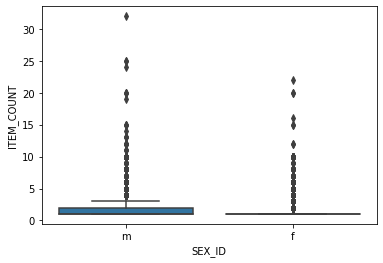

In [79]:
sns.boxplot(x='SEX_ID', y='ITEM_COUNT', data=ageto44)

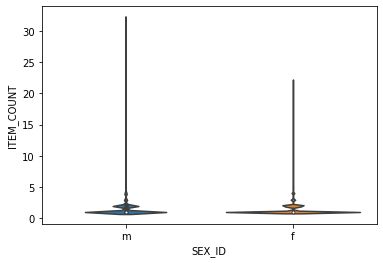

In [123]:
sns.violinplot(x='SEX_ID', y='ITEM_COUNT', data=ageto44)

In [112]:
items44 = ageto44['ITEM_COUNT'].value_counts()
items44

1     36510
2      9716
3      1412
4       997
5       275
6       138
10       73
8        54
7        39
9        12
12        8
20        5
15        5
13        3
11        3
25        2
24        1
14        1
16        1
19        1
22        1
32        1
Name: ITEM_COUNT, dtype: int64

In [95]:
# about the person that purchased 32 items

ageto44.loc[ageto44['ITEM_COUNT'] == 32] 

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
139036,m,39,198e079e9819b967768cb48ce372e4b6,32,2011-08-27 10:55:38,岐阜,3bd8560e940675b142932ff46eb16f52,be5f66ce12b2342ec0cdf9da9e96806e


In [96]:
# created a dataframe of males age group 15-24
malesto24 = ageto24.loc[ageto24['SEX_ID'] == 'm'] 
malesto24

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
283,m,24,f952e0253dcc028ed77739f2aa6f62f0,1,2011-07-07 12:22:41,北海道,313e8674dec8f684a547ac616fbce017,f30ab902792b5d7890e5cb4a35149963
807,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-01-17 17:48:19,新宿・高田馬場・中野・吉祥寺,7d1e9a2d25f2eb2def81dcb9b8b0d6fa,e36fe9f10d570f667b0fc7f4cf4c5df4
808,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-02-01 20:54:48,池袋・神楽坂・赤羽,a484aa1df326222084652290f30733ac,99307241673fa5f22e06f6336a650e28
809,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-04-03 15:17:40,新宿・高田馬場・中野・吉祥寺,a71cc6cb387ff29ea93c2ce88bf2896d,89b72c8e0e8272e05524b11d08c8a6fe
810,m,23,0175f1bb9e5a0266f81a4abf85999670,1,2012-05-21 20:21:32,新宿・高田馬場・中野・吉祥寺,860e43870bcce0fcb138606e6734bfbc,047fb1f23d8cedea8cb86956cfd4b7cf
...,...,...,...,...,...,...,...,...
168233,m,23,7c3e153a3b393f55bec6a7092ea1933d,1,2011-07-12 19:21:50,新宿・高田馬場・中野・吉祥寺,275ef36eeffb466cbecda07e93dc8d94,151aba4dbbe6b4cbc2637755fa4ed017
168234,m,23,7c3e153a3b393f55bec6a7092ea1933d,1,2011-07-26 12:50:37,池袋・神楽坂・赤羽,b7c32ad978242775cde58c492f806a9b,7e1d6eb3aff14dc422a2d9efc7008683
168574,m,24,d0bb2c8f990f16120b073a88ff2b7655,1,2012-04-03 13:45:11,銀座・新橋・東京・上野,dac0fc685fde0e494c735539a69f518f,ab1e843de15a5d9bc637cb7df6b4c730
168575,m,24,d0bb2c8f990f16120b073a88ff2b7655,1,2012-04-03 20:13:43,新宿・高田馬場・中野・吉祥寺,2aead2d3053692a432558101617021d5,89b72c8e0e8272e05524b11d08c8a6fe


In [97]:
# created a dataframe of females age group 15-24
femalesto24 = ageto24.loc[ageto24['SEX_ID'] == 'f'] 
femalesto24

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
417,f,24,a1305a969abc7cfd6702a048bffa3497,1,2011-07-08 23:10:00,大分,bed6b73f2877a0bbe1cae3065aeb4e92,2ea60829c84ee6f8e1b8ae35ea80f7c0
1333,f,21,35e72d593663c09cd92fa85262674e59,1,2011-09-01 11:34:22,新宿・高田馬場・中野・吉祥寺,dee91fe2fd829f736a04da7ef8442bf1,7fc6567f470af5356ae97097dbe18486
1334,f,21,35e72d593663c09cd92fa85262674e59,1,2011-11-21 12:05:45,新宿・高田馬場・中野・吉祥寺,02e962429eaebc5d48f675e68618fa2a,a262c7ff56a5cd3de3c5c40443f3018c
1335,f,21,35e72d593663c09cd92fa85262674e59,13,2011-11-24 16:24:46,愛知,f0c5aabafefe668cb0d92141dd51310a,a6a8c6d84ca52a02c8e88d05ea1159b3
1416,f,24,23469700fcf7bef27ca4fb3f5c3f0014,1,2011-12-21 12:55:22,北海道,c160a11c380f9c036b68adeccf7eca8c,40fd225be1ad917e074571aa29fceba7
...,...,...,...,...,...,...,...,...
168777,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-04 17:08:05,沖縄,e67e6b56c7c1dba6343d6cc01702b1a9,8b23a5dd048639401efcb63215426f95
168778,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-04 17:11:48,沖縄,075c1f05b51c37309dc83187262a87d5,99a348a3e2cf3b4791db0b58da6d9299
168779,f,23,594f9beb582e7ecfb6d91b34a5e19895,2,2011-12-07 13:29:33,沖縄,7baccf73debbf3faa92f338c15f43292,43cc407d8583cc6dcdd6b04ea327fd74
168864,f,22,11cd6b308aff9fa2db5edb3bdec1df85,1,2011-11-16 01:54:42,横浜,93663c2befb52a76442bdb149c0f59ae,52b7843de9da040b0a5fb01463d9d27f


In [98]:
# created a dataframe of males age group 25-44
malesto34 = ageto34.loc[ageto34['SEX_ID'] == 'm'] 
malesto34

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
18,m,25,43fc18f32eafb05713ec02935e2c2825,1,2012-02-08 13:04:05,山形,d88f6ab0f9b8d737c74e1e39e67045b8,e1d91d56d2a86d4cbe08e155497ad8f6
19,m,25,43fc18f32eafb05713ec02935e2c2825,1,2012-04-03 15:22:55,新宿・高田馬場・中野・吉祥寺,1cef71947aa1f80e7fa86b44c89d8ec0,89b72c8e0e8272e05524b11d08c8a6fe
20,m,25,43fc18f32eafb05713ec02935e2c2825,1,2012-05-21 19:41:41,新宿・高田馬場・中野・吉祥寺,e47445e2f58d7e9c052aa05a75bf3cdd,bf69bd9e0e26fa1f62243d1fcada38f1
21,m,25,43fc18f32eafb05713ec02935e2c2825,1,2012-06-04 21:39:42,新宿・高田馬場・中野・吉祥寺,0325b7df2461cc47c4a46c2eb6e73dae,09411858ae07c0be91aeeddacf4556b4
72,m,31,72f88db98f71be3f53c8090a02febc77,1,2012-01-05 08:44:24,北海道,422c3e8172836560b7caf3ec12c6ab05,113136ab9ebcbc17070129405bad96da
...,...,...,...,...,...,...,...,...
168951,m,32,e4c698c523fa9990e202caac41e340b4,1,2012-01-05 22:19:46,銀座・新橋・東京・上野,5a8a22a4e37deffedbd053676d859533,4b79e642538dd99c4f0296853693fb8e
168953,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2011-08-24 12:22:26,茨城,0210d78c3b0534d0bc82cf091b8ed95d,b7f66c2467309cb68603d531d0dd8bdc
168954,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2011-10-30 10:00:33,新宿・高田馬場・中野・吉祥寺,65afd29e0ccec70dfdfb62204620f9ef,a262c7ff56a5cd3de3c5c40443f3018c
168955,m,28,803dc5f6c705f20c3dbf2a80248a72f5,1,2012-05-22 00:07:35,新宿・高田馬場・中野・吉祥寺,2ac360da5507b4169c251384da8ee9d8,bf69bd9e0e26fa1f62243d1fcada38f1


In [99]:
# created a dataframe of females age group 25-44
femalesto34 = ageto34.loc[ageto34['SEX_ID'] == 'f'] 
femalesto34

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
0,f,25,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,34c48f84026e08355dc3bd19b427f09a
1,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,767673b7a777854a92b73b0934ddfae7
2,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,4f3b5b91d9831192557c056022fdc1f2
3,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,4f3b5b91d9831192557c056022fdc1f2
4,f,34,560574a339f1b25e57b0221e486907ed,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,4f3b5b91d9831192557c056022fdc1f2
...,...,...,...,...,...,...,...,...
168707,f,25,8780e0946c4916c0d55fc8b29b2d7844,1,2012-06-18 19:25:21,銀座・新橋・東京・上野,4fd51efd44a1551806f6a8a4f407c965,3bcc5f9e1bf023e87f6f0b729b68f4de
168710,f,32,1a175aa298b26ed4d8853c59f77834c1,2,2011-12-27 23:45:44,キタ,8fa545094a239b78ae9078ada04e68e2,5ff6226d5c988bbdd1c5bf667b5fd2b0
168711,f,32,1a175aa298b26ed4d8853c59f77834c1,1,2012-02-05 14:46:23,ミナミ他,ca86287224d506146eddd0455a541727,76608ad78632bd8a6b21e4a5aaf51288
168712,f,32,1a175aa298b26ed4d8853c59f77834c1,1,2012-06-05 22:36:54,新宿・高田馬場・中野・吉祥寺,ef211347305cd2039e392639189d3423,3d9029d3ec66802b11ee2645dc16e8cb


In [100]:
# created a dataframe of males age group 45-54
malesto54 = ageto54.loc[ageto54['SEX_ID'] == 'm'] 
malesto54

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
59,m,47,409d495d62c15f6fdbdff3e302d6db20,1,2012-01-01 00:58:25,新宿・高田馬場・中野・吉祥寺,04b079c7820ad57e33ea37297a1b520d,8191e1d26b73aabd21345bdb8f60dcef
60,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-12 11:04:40,キタ,1b1f56c687a45835c4a8d0a53e15feee,393d96af481a14617330a1a4f63206f6
61,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-18 11:46:52,ミナミ他,73ca4e9ea60df43d692c5446ed47590d,9accd387a21750f9c4a00d0599ba5dba
62,m,47,409d495d62c15f6fdbdff3e302d6db20,2,2012-01-24 12:15:39,キタ,4e97d121d128968e950087cd438f0922,d0e1b63cb7cc32edc3a6c619e4215368
63,m,47,409d495d62c15f6fdbdff3e302d6db20,1,2012-02-07 14:06:37,銀座・新橋・東京・上野,85b8d8176c5ce1c5f0ec39b6340c6719,d8648772edcfc8425b7b2c681065f29b
...,...,...,...,...,...,...,...,...
168904,m,50,90af7c9c7fe53dc3b02069649c5bbde6,1,2012-06-21 13:06:35,福岡,7a32d4f50835c6fef39af2bb3373a87c,e458342e41a8114b11d935c73cf858f2
168905,m,50,90af7c9c7fe53dc3b02069649c5bbde6,1,2012-06-21 13:06:35,福岡,bf37c1d5cc40c17339951fd31ecba01f,e458342e41a8114b11d935c73cf858f2
168906,m,50,90af7c9c7fe53dc3b02069649c5bbde6,1,2012-06-21 13:06:35,福岡,03385b2d271138bafd11f734a8b7e7a2,e458342e41a8114b11d935c73cf858f2
168908,m,50,3f1259a568d7c5e4eddf15c5b6b3b847,1,2011-08-07 17:26:19,新宿・高田馬場・中野・吉祥寺,dc96e9fda98993f2504c6eeb2ecd5df6,3fcfe22490030c9497ce1bfd3f5570eb


In [101]:
# created a dataframe of females age group 45-54
femalesto54 = ageto54.loc[ageto54['SEX_ID'] == 'f'] 
femalesto54

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
44,f,50,f430e8302c1fd0915bce0c068ecb2f82,2,2011-11-20 18:36:26,広島,a2121b24a10576765fd738a7fe4bf6b4,026bc45db375aa3e8d9687b87905563e
185,f,50,53d947bab765fdd817f10ba687556e45,1,2011-07-15 09:22:48,新宿・高田馬場・中野・吉祥寺,001f3511c29621985575242156792414,909303b9db946c7a744083d054ad08ed
186,f,50,53d947bab765fdd817f10ba687556e45,1,2011-07-30 15:19:05,キタ,1a6ca97c5f083184a68966bced5209c0,37f6fa11f842b24ccecbff03532748e7
187,f,50,53d947bab765fdd817f10ba687556e45,1,2011-08-04 03:39:10,北海道,ef1ebd9fcd66367a4cba26441fad4654,fa84df9205122d0cfb2fc78ae2063db7
220,f,46,fd0dbf23941b2deff8527c744f86447e,1,2012-03-14 18:52:52,恵比寿・目黒・品川,3a81081b817c361948f07d3f3f0f58af,1073b92cfc02a84a5f8170e0c17991e6
...,...,...,...,...,...,...,...,...
168922,f,47,7925512b7f686de876e21e8a1163dcb7,4,2011-12-13 17:48:09,ミナミ他,592777afa654439db1f7b07a8fbef345,4012d5c316c87c315e36489ec08162e3
168923,f,47,7925512b7f686de876e21e8a1163dcb7,2,2011-12-17 10:28:32,ミナミ他,99ae8b31244f3c9b3093b0c58e0d86de,026a5fa9d5f7a3db675dec50c78c022d
168924,f,47,7925512b7f686de876e21e8a1163dcb7,2,2012-02-07 15:32:26,ミナミ他,a254e59d7a09075aa83364761500ed91,77d9aa50a0ae7c9a651553717864b865
168925,f,47,7925512b7f686de876e21e8a1163dcb7,1,2012-04-18 14:13:17,キタ,9f4619eb21fb54e459e64981d2cc75a6,8de0edf79fc41037429e144f0c76a582


In [102]:
# created a dataframe of males age group 55+
malesto55plus = age55plus.loc[age55plus['SEX_ID'] == 'm'] 
malesto55plus

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
22,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-07-12 21:26:25,赤坂・六本木・麻布,6236509d170335ddac913622eb1be627,05f44676bd11c9f124c4a777c237d37f
23,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-08-02 10:27:13,赤坂・六本木・麻布,4032e8b84605e88a7013e24c2e0c6ee1,dba06f247ef3de4110017849d6e6535b
24,m,62,dc6df8aa860f8db0d710ce9d4839840f,2,2011-08-15 00:20:04,恵比寿・目黒・品川,5e2891fa2e1ae43204b94970bdb6a413,85b51e105d6faba453d30cd1504e0488
25,m,62,dc6df8aa860f8db0d710ce9d4839840f,1,2011-08-18 01:12:12,川崎・湘南・箱根他,1c34a0e1505de5679c52a348bdc2195c,0bbe8c44a9209af9a3e0d80a31038c84
26,m,62,dc6df8aa860f8db0d710ce9d4839840f,3,2011-08-20 08:18:11,新宿・高田馬場・中野・吉祥寺,e53483c228cfcd6a36d8f013914986ec,07d2e4b28b30fa0273921db95f345b5e
...,...,...,...,...,...,...,...,...
168917,m,65,64e879a55a00672264e40afcb663a2fb,1,2012-01-12 20:42:13,島根,53d88f13b24a77471b0369109f8a3ab1,a91bf9655acd821ee3388a5f6b264412
168918,m,65,64e879a55a00672264e40afcb663a2fb,2,2012-01-12 20:59:00,奈良,8b3218b16546cf297409ac63b33e0cad,cbd6d561fad8d2e086a52807fd7a908d
168919,m,65,64e879a55a00672264e40afcb663a2fb,1,2012-02-12 22:42:37,ミナミ他,5bf6e5e3739c7834ae97044bf0e7041b,621e007970c909fe8d6be9012aecde29
168920,m,65,64e879a55a00672264e40afcb663a2fb,1,2012-05-11 23:52:00,キタ,23ad0a1dec116863416cbc3f122fb0af,b10d6fad47189ea1e920be18d27edee2


In [103]:
# created a dataframe of females age group 55+
femalesto55plus = age55plus.loc[age55plus['SEX_ID'] == 'f'] 
femalesto55plus

,SEX_ID,AGE,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,COUPON_ID_hash
181,f,59,a0590e7bb2c183cfe64db51cdb72fcb1,1,2011-08-26 09:15:27,新宿・高田馬場・中野・吉祥寺,6451e1d9be1c7d1ee01f8e848aad2564,a1b8c218ea962fdff83141b586cd2ccd
182,f,59,a0590e7bb2c183cfe64db51cdb72fcb1,1,2011-10-28 17:45:51,新宿・高田馬場・中野・吉祥寺,6b5a2f954712f27eea8d634e4a4cfd2b,a262c7ff56a5cd3de3c5c40443f3018c
183,f,59,a0590e7bb2c183cfe64db51cdb72fcb1,1,2012-03-12 10:24:01,愛知,4d7d07b57030136b13feab26451e27ca,deb0c51200b9db8f568d4e8bdc07cec8
207,f,58,f55c2f67be0321adcecc696ebe6aefd2,1,2012-02-09 22:47:31,千葉,2854125cf27841a5e4f1d23c41e5c868,2411f909ea2539cd436f7d24b2015628
208,f,58,f55c2f67be0321adcecc696ebe6aefd2,1,2012-02-17 11:32:08,栃木,2779ec028f8a6b0e8bd12755dc0ca5fc,b1bfdc006b073425a87d28bcba5fab58
...,...,...,...,...,...,...,...,...
168933,f,57,0ccb3f30fe2cb622e34df0a50e42628c,3,2012-01-29 14:38:59,キタ,aba590f418efb0fb135ab37388ab1ec4,6a2c213bad6e15b881420ae80c292b8f
168934,f,57,0ccb3f30fe2cb622e34df0a50e42628c,1,2012-03-18 11:14:25,京都,a7bb0905f54291d2a67dea9cd67e4abe,e362c49f89fb245638891214be7cee06
168935,f,57,0ccb3f30fe2cb622e34df0a50e42628c,2,2012-04-03 22:50:25,キタ,d56f7cd04086e2764fac2bf004a92401,3eecc2290c337aab93cc7ee951b2d790
168936,f,57,0ccb3f30fe2cb622e34df0a50e42628c,1,2012-04-11 23:52:20,京都,d4c3be7083dd20a95637548fcc1e087d,859a3af6276d4721628a08ee50151d6b


In [104]:
# there is no difference in the average Item Count in the age group of 15-24 between males and females

stats.ttest_ind(malesto24['ITEM_COUNT'], femalesto24['ITEM_COUNT'], equal_var=False)

Ttest_indResult(statistic=2.0455262886078116, pvalue=0.04091930987182389)

In [125]:
pvalue=0.04091930987182389
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


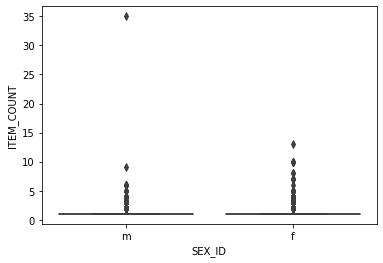

In [108]:
sns.boxplot(x='SEX_ID', y='ITEM_COUNT', data=ageto24)

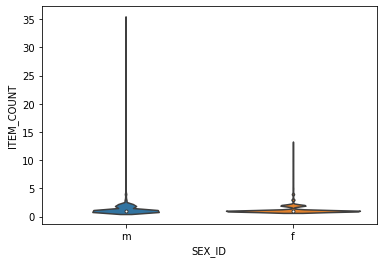

In [122]:
sns.violinplot(x='SEX_ID', y='ITEM_COUNT', data=ageto24)

In [114]:
items24 = ageto24['ITEM_COUNT'].value_counts()
items24

1     3147
2      679
3       67
4       50
5       15
6        6
7        4
10       4
8        2
35       1
13       1
9        1
Name: ITEM_COUNT, dtype: int64

In [105]:
# there is no difference in the average Item Count in the age group of 25-34 between males and females

stats.ttest_ind(malesto34['ITEM_COUNT'], femalesto34['ITEM_COUNT'], equal_var=False)

Ttest_indResult(statistic=11.32800381361671, pvalue=1.1944082324653237e-29)

In [126]:
pvalue=1.1944082324653237e-29
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


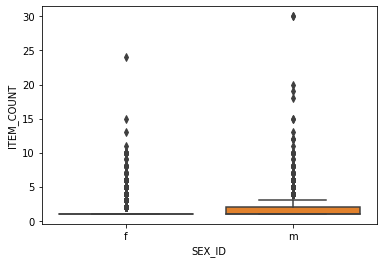

In [109]:
sns.boxplot(x='SEX_ID', y='ITEM_COUNT', data=ageto34)

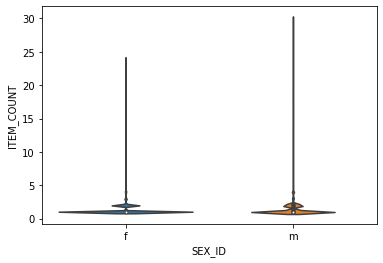

In [121]:
sns.violinplot(x='SEX_ID', y='ITEM_COUNT', data=ageto34)

In [113]:
items34 = ageto34['ITEM_COUNT'].value_counts()
items34

1     24449
2      5796
3       536
4       451
5       128
6        88
10       34
8        30
7        24
9         4
12        3
15        3
30        2
11        2
13        2
24        1
20        1
19        1
18        1
Name: ITEM_COUNT, dtype: int64

In [106]:
# there is no difference in the average Item Count in the age group of 45-54 between males and females

stats.ttest_ind(malesto54['ITEM_COUNT'], femalesto54['ITEM_COUNT'], equal_var=False)

Ttest_indResult(statistic=13.29124021738236, pvalue=3.132103992384944e-40)

In [127]:
pvalue=3.132103992384944e-40
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


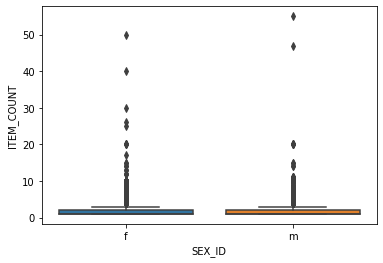

In [110]:
sns.boxplot(x='SEX_ID', y='ITEM_COUNT', data=ageto54)

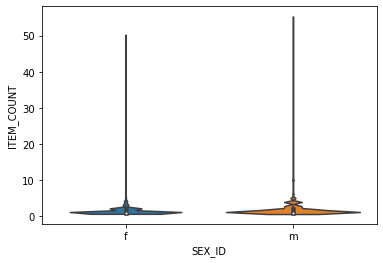

In [120]:
sns.violinplot(x='SEX_ID', y='ITEM_COUNT', data=ageto54)

In [115]:
items54 = ageto54['ITEM_COUNT'].value_counts()
items54

1     33352
2     11556
3      1793
4      1229
5       390
6       177
10       92
8        56
7        49
20        9
9         9
11        5
14        4
15        4
12        3
13        2
26        1
40        1
47        1
17        1
50        1
55        1
25        1
30        1
Name: ITEM_COUNT, dtype: int64

In [107]:
# there is no difference in the average Item Count in the age group of 55+ between males and females

stats.ttest_ind(malesto55plus['ITEM_COUNT'], femalesto55plus['ITEM_COUNT'], equal_var=False)

Ttest_indResult(statistic=17.100255441441764, pvalue=2.7870765373897002e-65)

In [128]:
pvalue=2.7870765373897002e-65
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


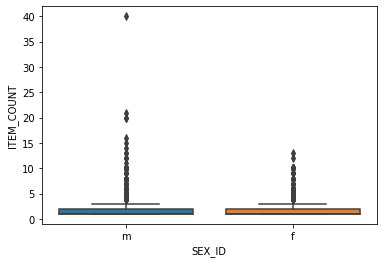

In [111]:
sns.boxplot(x='SEX_ID', y='ITEM_COUNT', data=age55plus)

In [116]:
items55 = age55plus['ITEM_COUNT'].value_counts()
items55

1     22374
2     10122
3      1444
4       990
5       277
6       140
10       42
8        32
7        21
9        10
12        4
13        3
20        2
40        1
11        1
14        1
15        1
16        1
21        1
Name: ITEM_COUNT, dtype: int64

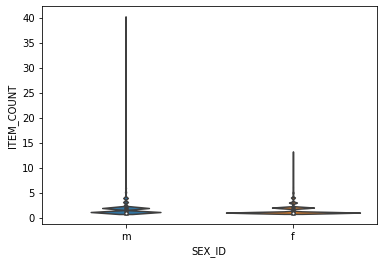

In [119]:
sns.violinplot(x='SEX_ID', y='ITEM_COUNT', data=age55plus)